# Metric
My metric is the crime per neighborhood. Each neighborhood's crimes were listed and for each crime was an integer value from 0-99 that rated how severe the crime was. So I averaged these numbers for each neighborhood to decide which neighborhood was the most dangerous.

# Count of Crimes per Neighborhood

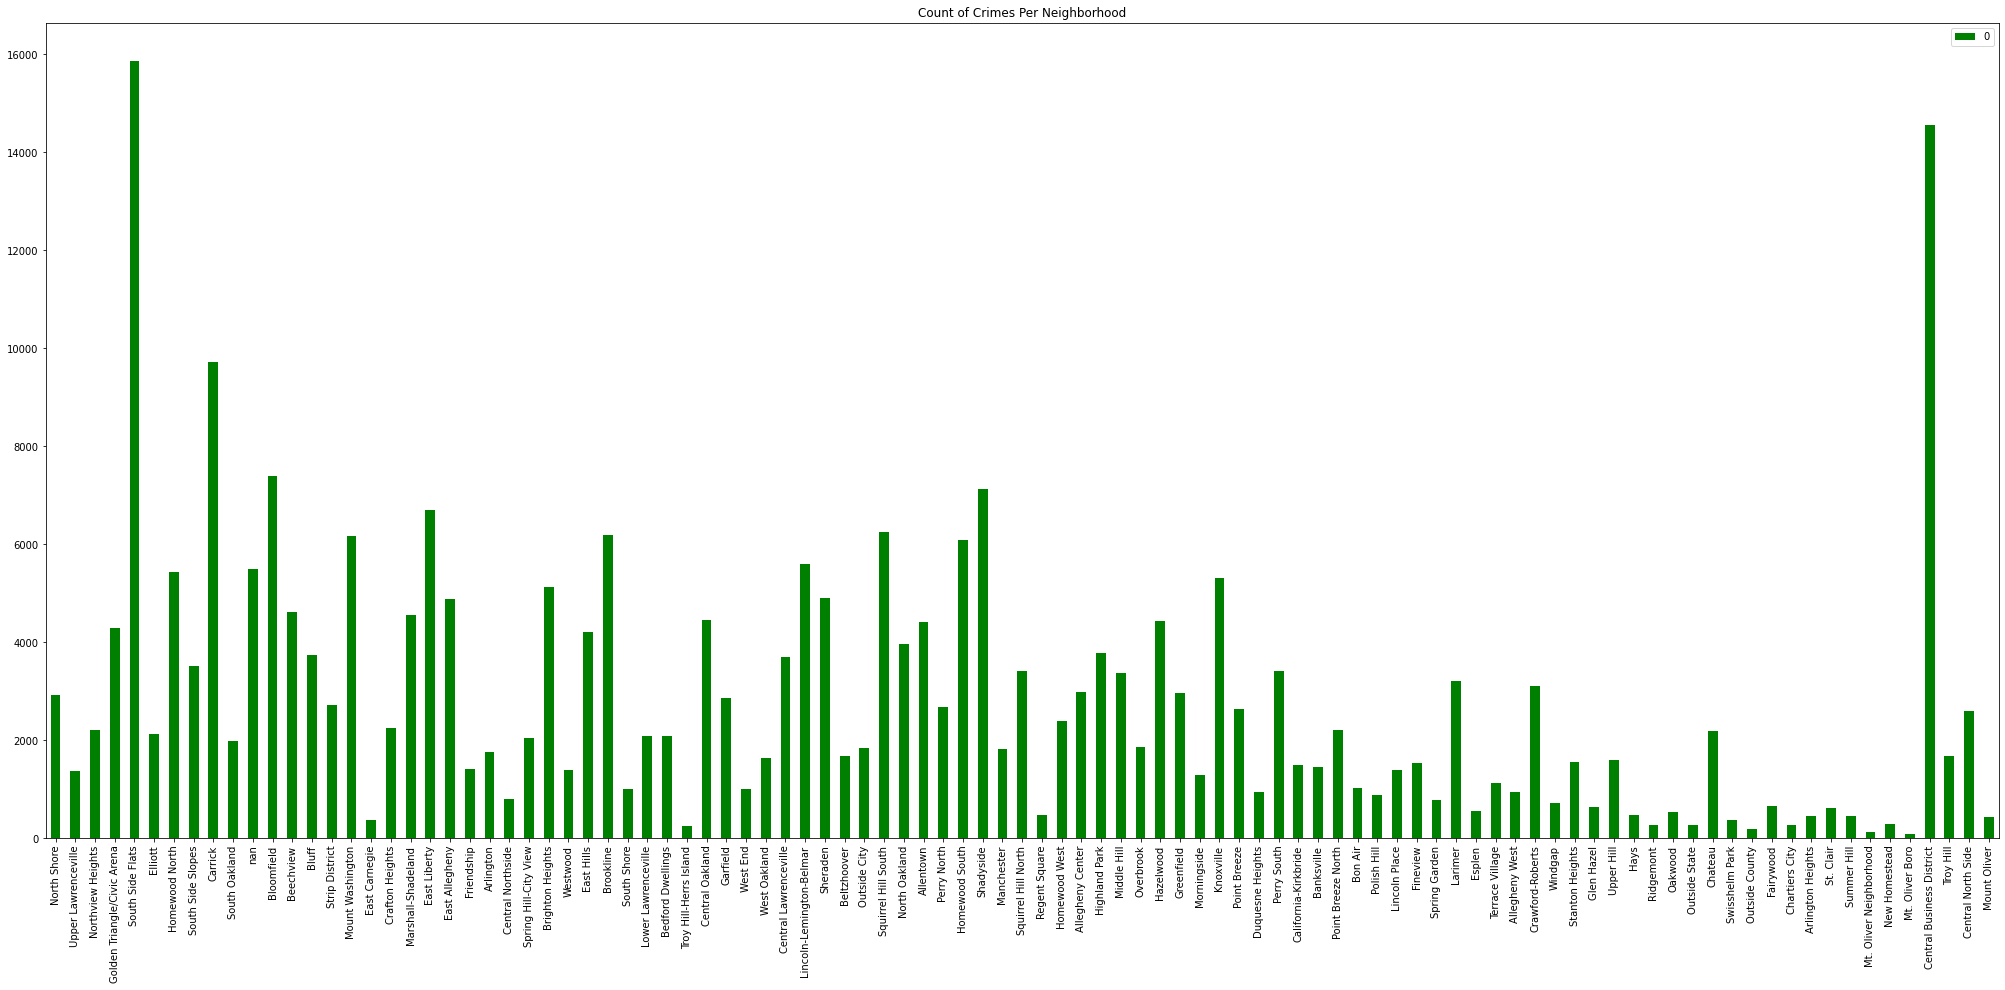

In [17]:
import pandas as pd
import geopandas
%matplotlib inline

chip = pd.read_csv("data/CrimeRate.csv")

dict = {}
dict_count = {}
for index, row in chip.iterrows():
    if not row['INCIDENTNEIGHBORHOOD'] in dict:
        dict[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = 1
    else:
        dict[row['INCIDENTNEIGHBORHOOD']] = dict.get(row['INCIDENTNEIGHBORHOOD']) + row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = dict_count.get(row['INCIDENTNEIGHBORHOOD']) + 1
        
mean = {}
for (k,v), (k2,v2) in zip(dict.items(), dict_count.items()):
     mean[k] = v/v2

count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')

#neighborhoods = geopandas.read_file("data/neighborhoods.shp") # read in the shapefile
#mean_map = neighborhoods.merge(mean_dataframe, how='left')
count_df.plot(kind = "bar", figsize=(35,15), color= "green", title = "Count of Crimes Per Neighborhood")


# Average Crime Per Neighborhood

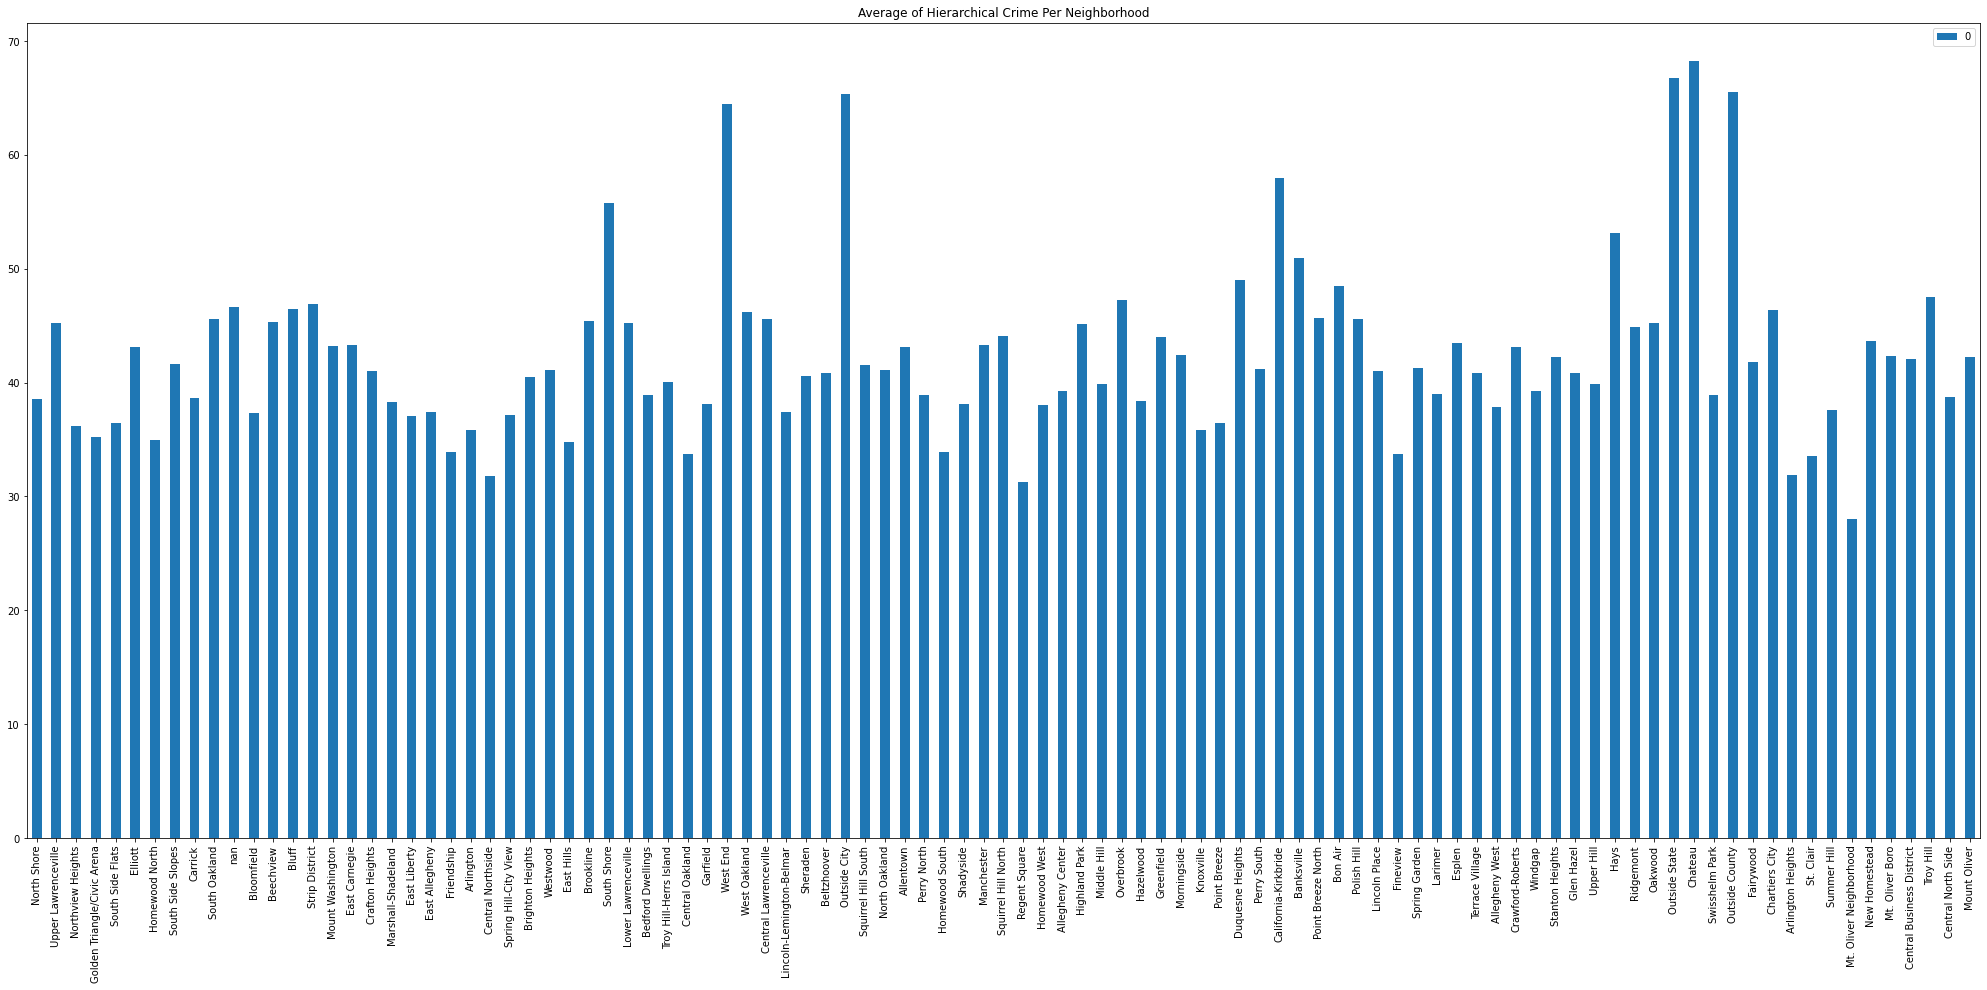

In [18]:
mean_dataframe.plot(kind = "bar", figsize=(35,15), title = "Average of Hierarchical Crime Per Neighborhood")

# Sorted Data

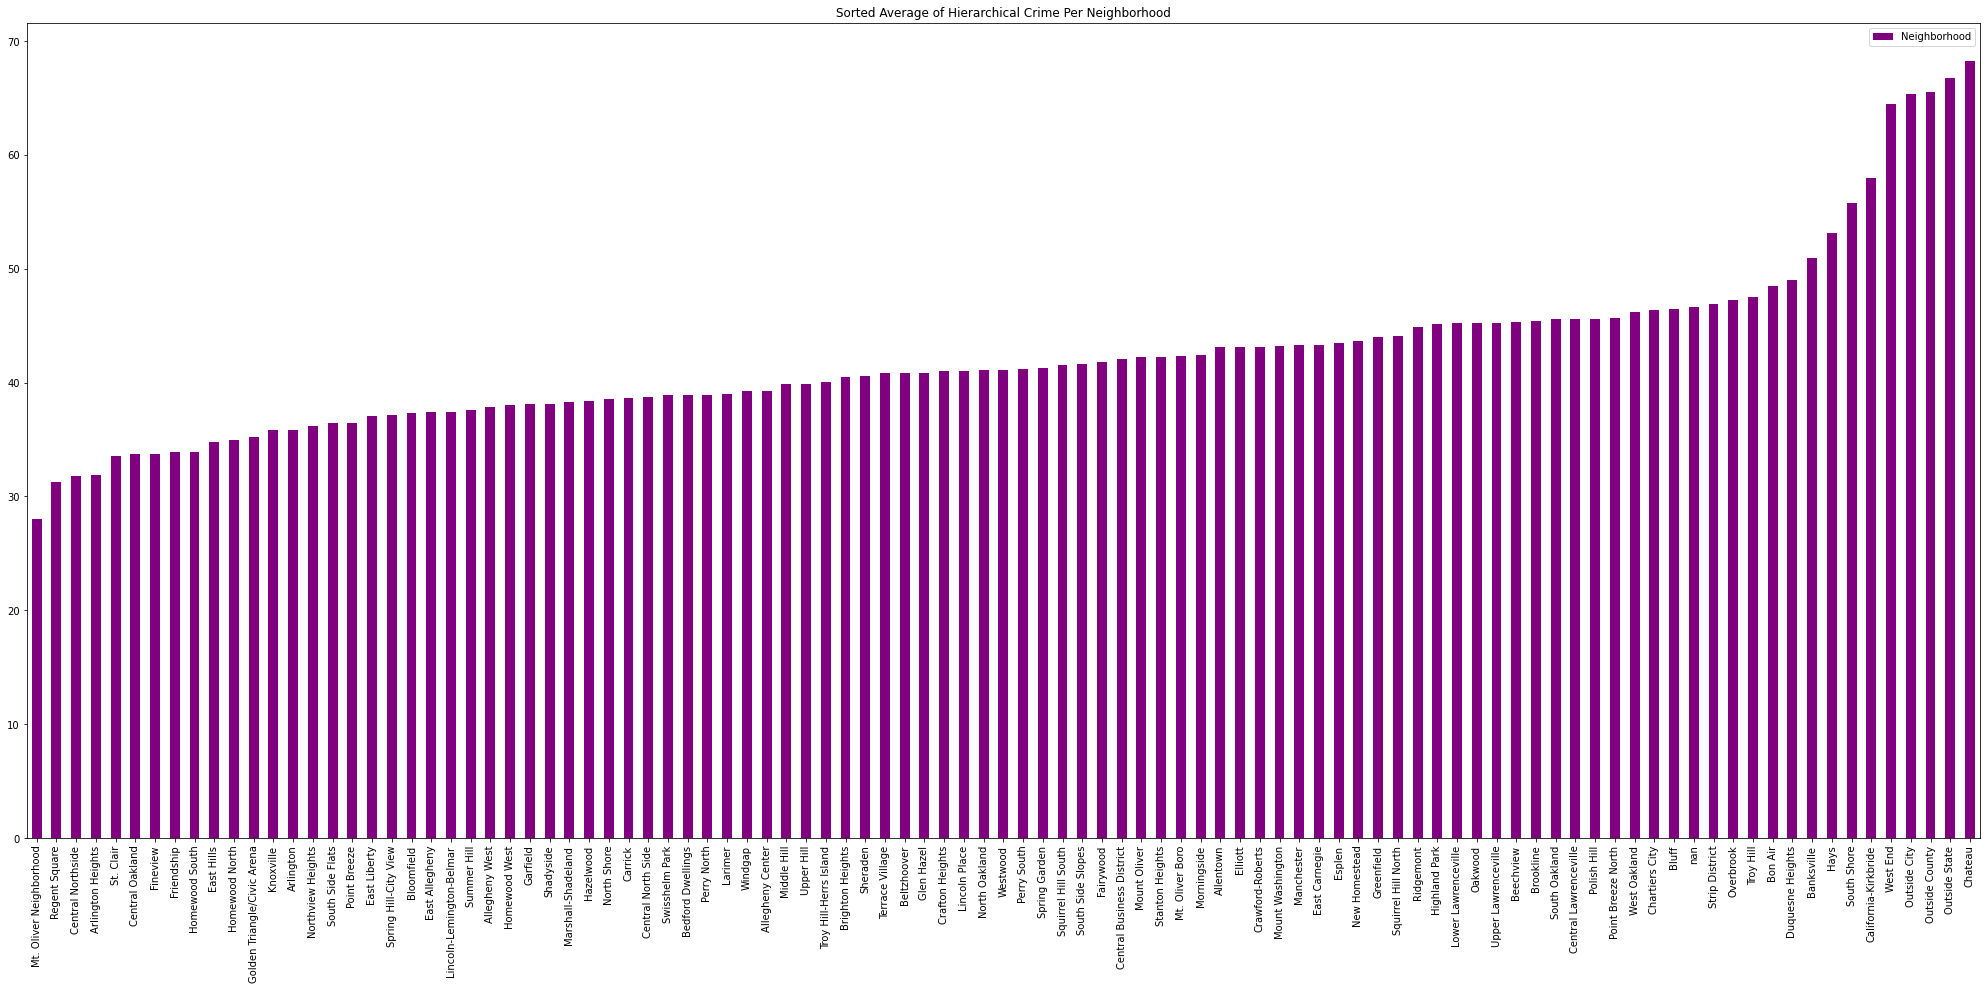

In [19]:
mean_dataframe.columns = ['Neighborhood']
sorted_mean = mean_dataframe.sort_values('Neighborhood', axis = 0, ascending = True, kind = "quicksort")
sorted_mean.plot(kind = "bar", figsize=(35,15), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

# Conclusion
I took all of the neigborhoods in Pittsburgh included in a data set which included statisitcs on all the crimes that took place in different neighborhoods. Included in each crime and neighborhood was a hierarchy number for the crime which represented how bad the crime was. I took hierarchies for each neighborhood's crimes and added them up. I then found the average of them using the sum of the hierarchies and the total number of crimes for each neihborhood. As a result, I conclude that Mt. Oliver is the best because it has the least average of hierarchical crime and a low amount of overall crimes commited.